Hospital Mortality Data

Goal : Predict in-hospital death

Dataset: 

- The dataset has 111 Columns and 4000 rows

- majority : miniority class = 13.5% of the dataset

- Evaluation Metric: ROC - AUC

I have used ROC - AUC as scoring metrics as both classes is important for a hospital. The hospital will treat in the same way to both the patient even if a particular patient has high probabilities of dieing in the hospital. For doctors every patient is important.

# Result

- Best Model parameters:<br>
    StackingClassifier(final estimator=<b>Logistic Regression</b>,{'final_estimator__C': 0.2, 'stack_method': 'auto'}) <br>
   and the following 5 estimators:<br>
    1. Logistic Regression {'C': 1, 'penalty': 'l2'}<br>
    2. Random Forest {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 500}<br>
    3. SVM {'C': 0.01, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}<br>
    4. ExtraTrees {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}<br>
    5. XGBoost {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.8}<br><br>
    
- Mean Cross validation score of Best model:<br>
   0.856018
- Train score of bestmodel:<br>
   0.961326
- Test score of best model:<br>
   0.864968
     	

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime



# Data Preprocessing

In [2]:
data = pd.read_csv('hospital_mortality.csv')

data.head()

,PATIENT_ID,Age,Gender,Height,ICUType,BUN_Min,Creatinine_Min,GCS_Min,Glucose_Min,HCO3_Min,...,Na_Range,PaCO2_Range,PaO2_Range,Platelets_Range,Temp_Range,Urine_Range,WBC_Range,Weight_Range,pH_Range,In-hospital_death
0,132539.0,54.0,0.0,-1.0,4.0,8.0,0.7,14.0,115.0,26.0,...,1.0,NaN,NaN,36.0,3.1,900.0,1.8,0.0,NaN,0
1,132540.0,76.0,1.0,175.3,2.0,16.0,0.8,3.0,105.0,21.0,...,4.0,13.0,363.0,91.0,3.4,770.0,5.9,5.6,0.11,0
2,132541.0,44.0,0.0,-1.0,3.0,3.0,0.3,5.0,119.0,24.0,...,3.0,4.0,167.0,41.0,2.3,407.0,2.5,0.0,0.04,0
3,132543.0,68.0,1.0,180.3,3.0,10.0,0.7,14.0,106.0,27.0,...,4.0,NaN,NaN,107.0,1.9,600.0,3.6,0.0,NaN,0
4,132545.0,88.0,0.0,-1.0,3.0,25.0,1.0,15.0,92.0,18.0,...,1.0,NaN,NaN,12.0,2.0,204.0,1.0,0.0,NaN,0


In [3]:
pd.pandas.set_option('display.max_columns', 999)
data.head(5)

,PATIENT_ID,Age,Gender,Height,ICUType,BUN_Min,Creatinine_Min,GCS_Min,Glucose_Min,HCO3_Min,HCT_Min,HR_Min,K_Min,Mg_Min,NIDiasABP_Min,NIMAP_Min,NISysABP_Min,Na_Min,PaCO2_Min,PaO2_Min,Platelets_Min,Temp_Min,Urine_Min,WBC_Min,Weight_Min,pH_Min,BUN_Max,Creatinine_Max,GCS_Max,Glucose_Max,HCO3_Max,HCT_Max,HR_Max,K_Max,Mg_Max,NIDiasABP_Max,NIMAP_Max,NISysABP_Max,Na_Max,PaCO2_Max,PaO2_Max,Platelets_Max,Temp_Max,Urine_Max,WBC_Max,Weight_Max,pH_Max,BUN_Mean,Creatinine_Mean,GCS_Mean,Glucose_Mean,HCO3_Mean,HCT_Mean,HR_Mean,K_Mean,Mg_Mean,NIDiasABP_Mean,NIMAP_Mean,NISysABP_Mean,Na_Mean,PaCO2_Mean,PaO2_Mean,Platelets_Mean,Temp_Mean,Urine_Mean,WBC_Mean,Weight_Mean,pH_Mean,BUN_Median,Creatinine_Median,GCS_Median,Glucose_Median,HCO3_Median,HCT_Median,HR_Median,K_Median,Mg_Median,NIDiasABP_Median,NIMAP_Median,NISysABP_Median,Na_Median,PaCO2_Median,PaO2_Median,Platelets_Median,Temp_Median,Urine_Median,WBC_Median,Weight_Median,pH_Median,BUN_Range,Creatinine_Range,GCS_Range,Glucose_Range,HCO3_Range,HCT_Range,HR_Range,K_Range,Mg_Range,NIDiasABP_Range,NIMAP_Range,NISysABP_Range,Na_Range,PaCO2_Range,PaO2_Range,Platelets_Range,Temp_Range,Urine_Range,WBC_Range,Weight_Range,pH_Range,In-hospital_death
0,132539.0,54.0,0.0,-1.0,4.0,8.0,0.7,14.0,115.0,26.0,30.3,58.0,4.0,1.5,39.0,58.67,96.0,136.0,NaN,NaN,185.0,35.1,0.0,9.4,-1.0,NaN,13.0,0.8,15.0,205.0,28.0,33.7,86.0,4.4,1.9,67.0,92.33,157.0,137.0,NaN,NaN,221.0,38.2,900.0,11.2,-1.0,NaN,10.500000,0.750000,14.923077,160.000000,27.000000,32.500000,70.810811,4.20,1.700000,50.147059,71.559118,114.382353,136.500000,NaN,NaN,203.000000,37.357143,171.052632,10.300000,-1.000000,NaN,10.5,0.75,15.0,160.0,27.0,33.5,73.0,4.2,1.70,49.0,70.000,110.0,136.5,NaN,NaN,203.0,37.70,100.0,10.3,-1.0,NaN,5.0,0.1,1.0,90.0,2.0,3.4,28.0,0.4,0.4,28.0,33.66,61.0,1.0,NaN,NaN,36.0,3.1,900.0,1.8,0.0,NaN,0
1,132540.0,76.0,1.0,175.3,2.0,16.0,0.8,3.0,105.0,21.0,24.7,65.0,3.5,1.9,38.0,49.33,72.0,135.0,33.0,82.0,135.0,34.5,0.0,7.4,76.0,7.34,21.0,1.3,15.0,146.0,24.0,30.7,90.0,4.3,3.1,67.0,88.33,131.0,139.0,46.0,445.0,226.0,37.9,770.0,13.3,81.6,7.45,18.333333,1.100000,13.333333,125.500000,22.333333,28.655556,80.794118,3.90,2.300000,56.714286,75.308571,112.500000,137.000000,38.857143,210.142857,178.600000,36.939130,151.560976,11.266667,80.670588,7.395,18.0,1.20,15.0,125.5,22.0,28.8,80.0,3.9,2.10,59.0,78.165,115.0,137.0,40.0,153.0,181.0,37.45,90.0,13.1,80.6,7.4,5.0,0.5,12.0,41.0,3.0,6.0,25.0,0.8,1.2,29.0,39.00,59.0,4.0,13.0,363.0,91.0,3.4,770.0,5.9,5.6,0.11,0
2,132541.0,44.0,0.0,-1.0,3.0,3.0,0.3,5.0,119.0,24.0,26.7,57.0,2.3,1.3,66.0,83.33,111.0,137.0,33.0,65.0,72.0,36.7,18.0,3.7,56.7,7.47,8.0,0.4,8.0,143.0,26.0,29.4,113.0,8.6,1.9,95.0,110.00,150.0,140.0,37.0,232.0,113.0,39.0,425.0,6.2,56.7,7.51,4.666667,0.333333,5.923077,134.333333,25.000000,28.460000,83.759259,4.26,1.720000,79.000000,96.751316,132.263158,138.333333,35.500000,134.500000,89.666667,37.800000,124.951220,4.700000,56.700000,7.495,3.0,0.30,5.0,141.0,25.0,28.7,85.5,3.4,1.80,79.0,97.670,134.0,138.0,36.0,120.5,84.0,37.85,100.0,4.2,56.7,7.5,5.0,0.1,3.0,24.0,2.0,2.7,56.0,6.3,0.6,29.0,26.67,39.0,3.0,4.0,167.0,41.0,2.3,407.0,2.5,0.0,0.04,0
3,132543.0,68.0,1.0,180.3,3.0,10.0,0.7,14.0,106.0,27.0,36.1,57.0,3.8,1.9,45.0,68.33,102.0,137.0,NaN,NaN,284.0,35.1,100.0,7.9,84.6,NaN,23.0,0.9,15.0,129.0,28.0,41.3,88.0,4.2,2.1,81.0,100.70,140.0,141.0,NaN,NaN,391.0,37.0,700.0,11.5,84.6,NaN,17.666667,0.766667,14.944444,117.333333,27.666667,37.442857,70.983333,4.00,2.033333,65.051724,83.885517,121.551724,139.333333,NaN,NaN,330.000000,36.223077,545.833333,9.400000,84.600000,NaN,20.0,0.70,15.0,117.0,28.0,36.8,74.0,4.0,2.10,64.0,83.670,120.0,140.0,NaN,NaN,315.0,36.40,625.0,8.8,84.6,NaN,13.0,0.2,1.0,23.0,1.0,5.2,31.0,0.4,0.2,36.0,32.37,38.0,4.0,NaN,NaN,107.0,1.9,600.0,3.6,0.0,NaN,0
4,132545.0,88.0,0.0,-1.0,3.0,25.0,1.0,15.0,92.0,18.0,22.6,65.0,3.8,1.5,26.0,52.33,105.0,139.0,NaN,NaN,97.0,35.8,16.0,3.8,-1.0,NaN,45.0,1.0,15.0,113.0,20.0,32.4,94.0,6.0,1.6,96.0,105.70,157.0,140.0,NaN,NaN,109.0,37.8,220.0,4.8,-1.0,NaN,35.000

In [4]:
from collections import Counter
counter=Counter(data['In-hospital_death'])
print(counter)

Counter({0: 3446, 1: 554})


In [5]:
data['In-hospital_death'].value_counts()

0    3446
1     554
Name: In-hospital_death, dtype: int64

In [6]:
data=data.drop(columns='PATIENT_ID',axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 110 entries, Age to In-hospital_death
dtypes: float64(109), int64(1)
memory usage: 3.4 MB


In [8]:
data['Gender']= data['Gender'].astype(object)
data['ICUType']= data['ICUType'].astype(object)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 110 entries, Age to In-hospital_death
dtypes: float64(107), int64(1), object(2)
memory usage: 3.4+ MB


## Quantifying Missing Data¶

In [10]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

Age [54. 76. 44. 68. 88. 64. 78. 74. 71. 66. 84. 77. 65. 40. 48. 58. 81. 35.
 26. 80.] 

Gender [0.0 1.0 -1.0] 

Height [ -1.  175.3 180.3 162.6 157.5 170.2 167.6 182.9 165.1 154.9 188.  137.2
 177.8 172.9 152.4 160.  149.9 185.4 172.7 166.4] 

ICUType [4.0 2.0 3.0 1.0] 

BUN_Min [ 8. 16.  3. 10. 25. 15. 31. 58. 21. 17. 55.  9. 83. 40. 34. 29. 14.  7.
  5. 13.] 

Creatinine_Min [0.7 0.8 0.3 1.  3.4 0.6 1.2 0.5 1.3 3.3 1.1 1.7 0.9 2.2 1.4 4.7 0.4 2.1
 4.9 1.5] 

GCS_Min [14.  3.  5. 15.  7.  8. 10.  9. nan  6. 13.  4. 12. 11.] 

Glucose_Min [115. 105. 119. 106.  92. 153.  94. 116. 112.  81. 132. 166. 151.  90.
 101. 154. 118.  96.  63.  91.] 

HCO3_Min [26. 21. 24. 27. 18. 19. 23. 11. 17. 25. 31. 22. 20. 14. 28. 32.  8. 29.
 15. nan] 

HCT_Min [30.3 24.7 26.7 36.1 22.6 35.  30.  32.6 28.3 26.4 18.1 27.4 28.1 27.
 27.6 26.  30.2 25.8 15.1 20.2] 

HR_Min [ 58.  65.  57.  71.  50.  55. 115.  67.  82.  77.  64.  53.  66.  76.
  84.  59.  nan  56.  49.  87.] 

K_Min [4.  3.5 2.3 3.8 3.4 3.9 

 29.05 27.7  30.   36.   28.9  35.5  25.   23.7 ] 

HR_Median [ 73.   80.   85.5  74.   91.   68.  128.   86.  101.   95.   88.   84.
  92.   96.   67.    nan  66.   78.   83.5  70. ] 

K_Median [4.2  3.9  3.4  4.   3.65 4.5  4.35 4.2  3.7  4.1  4.4  4.15 3.6  4.45
 4.7  2.95 5.15 3.95 3.8  4.55] 

Mg_Median [1.7  2.1  1.8  1.55 1.9  2.2  1.65 2.8  1.5  2.25 2.   2.15 2.5  1.95
 1.3  2.3  1.45 2.05 2.65 2.6 ] 

NIDiasABP_Median [49.  59.  79.  64.  42.  70.5 77.  27.  65.  53.  48.  45.  56.  48.5
 46.   nan 82.  44.  49.5 55. ] 

NIMAP_Median [ 70.     78.165  97.67   83.67   75.33   81.985 112.     52.     84.17
  75.67   57.     65.335  72.     81.835     nan 104.7    65.165  58.
  64.67   74.67 ] 

NISysABP_Median [110.  115.  134.  120.  131.  105.  178.  101.  125.5 121.   86.  107.5
 117.  151.5   nan 156.  118.   89.   92.  111. ] 

Na_Median [136.5 137.  138.  140.  139.5 139.  141.  136.  137.5 134.  167.  141.5
 148.  143.5 142.  146.  134.5 132.5 135.  147. ] 

PaCO2_Median

In [11]:
data['Gender'].value_counts()

 1.0    2246
 0.0    1751
-1.0       3
Name: Gender, dtype: int64

In [12]:
# Removing samples for which Gender is other than 0 and 1
data=data[data.Gender!=-1]

In [13]:
data['Gender'].value_counts()

1.0    2246
0.0    1751
Name: Gender, dtype: int64

In [14]:
data['Height'].value_counts()

-1.0      1892
 177.8     213
 182.9     188
 170.2     173
 172.7     169
          ... 
 194.3       1
 139.7       1
 169.4       1
 172.9       1
 15.2        1
Name: Height, Length: 71, dtype: int64

In [15]:
data=data.drop(columns='Height',axis=1)
#I have removed height as there are 1892 neagtive instanance 

In [16]:
data['Weight_Min'].value_counts()

-1.00      325
 70.00     100
 80.00      81
 90.00      62
 60.00      58
          ... 
 113.90      1
 44.10       1
 61.80       1
 84.76       1
 103.80      1
Name: Weight_Min, Length: 842, dtype: int64

In [17]:
data['Weight_Min']=data['Weight_Min'].replace(-1, np.nan)

In [18]:
data.shape

(3997, 109)

In [19]:
# missing values
for i in data.columns:
    if data[i].isnull().mean()>0:
        print(i,': ', data[i].isnull().mean())

BUN_Min :  0.016012009006755066
Creatinine_Min :  0.016012009006755066
GCS_Min :  0.01576182136602452
Glucose_Min :  0.028271203402551914
HCO3_Min :  0.019014260695521642
HCT_Min :  0.016012009006755066
HR_Min :  0.015511633725293971
K_Min :  0.0240180135101326
Mg_Min :  0.025769326995246436
NIDiasABP_Min :  0.12909682261696273
NIMAP_Min :  0.1295971978984238
NISysABP_Min :  0.12659494620965725
Na_Min :  0.018764073054791094
PaCO2_Min :  0.24418313735301475
PaO2_Min :  0.24418313735301475
Platelets_Min :  0.01701275956967726
Temp_Min :  0.01576182136602452
Urine_Min :  0.02902176632474356
WBC_Min :  0.018263697773329996
Weight_Min :  0.08131098323742807
pH_Min :  0.23992994746059546
BUN_Max :  0.016012009006755066
Creatinine_Max :  0.016012009006755066
GCS_Max :  0.01576182136602452
Glucose_Max :  0.028271203402551914
HCO3_Max :  0.019014260695521642
HCT_Max :  0.016012009006755066
HR_Max :  0.015511633725293971
K_Max :  0.0240180135101326
Mg_Max :  0.025769326995246436
NIDiasABP_Max :

In [20]:
# Finding Null values in each of the columns/features
null_cols = []
cols=data.columns
Null_value_col={}
for i in cols:
    a=data[i].isnull().mean()
    if a>.30:
        Null_value_col[i]=a
        null_cols.append(i)
Null_value_col

{}

In [21]:
data=data.drop(columns=null_cols,axis=1)

In [22]:
data.shape

(3997, 109)

In [23]:
# Finding Null values in each of the columns/features
cols=data.columns
Null_value_col={}
for i in cols:
    a=data[i].isnull().mean()    
    if a>0:
        Null_value_col[i]=a
Null_value_col

{'BUN_Min': 0.016012009006755066,
 'Creatinine_Min': 0.016012009006755066,
 'GCS_Min': 0.01576182136602452,
 'Glucose_Min': 0.028271203402551914,
 'HCO3_Min': 0.019014260695521642,
 'HCT_Min': 0.016012009006755066,
 'HR_Min': 0.015511633725293971,
 'K_Min': 0.0240180135101326,
 'Mg_Min': 0.025769326995246436,
 'NIDiasABP_Min': 0.12909682261696273,
 'NIMAP_Min': 0.1295971978984238,
 'NISysABP_Min': 0.12659494620965725,
 'Na_Min': 0.018764073054791094,
 'PaCO2_Min': 0.24418313735301475,
 'PaO2_Min': 0.24418313735301475,
 'Platelets_Min': 0.01701275956967726,
 'Temp_Min': 0.01576182136602452,
 'Urine_Min': 0.02902176632474356,
 'WBC_Min': 0.018263697773329996,
 'Weight_Min': 0.08131098323742807,
 'pH_Min': 0.23992994746059546,
 'BUN_Max': 0.016012009006755066,
 'Creatinine_Max': 0.016012009006755066,
 'GCS_Max': 0.01576182136602452,
 'Glucose_Max': 0.028271203402551914,
 'HCO3_Max': 0.019014260695521642,
 'HCT_Max': 0.016012009006755066,
 'HR_Max': 0.015511633725293971,
 'K_Max': 0.024018

In [24]:
null_col = []
for col in data.columns:
    null_count = sum((data[col].isnull()))
    if null_count > 0:
        null_col.append(col)
null_col

['BUN_Min',
 'Creatinine_Min',
 'GCS_Min',
 'Glucose_Min',
 'HCO3_Min',
 'HCT_Min',
 'HR_Min',
 'K_Min',
 'Mg_Min',
 'NIDiasABP_Min',
 'NIMAP_Min',
 'NISysABP_Min',
 'Na_Min',
 'PaCO2_Min',
 'PaO2_Min',
 'Platelets_Min',
 'Temp_Min',
 'Urine_Min',
 'WBC_Min',
 'Weight_Min',
 'pH_Min',
 'BUN_Max',
 'Creatinine_Max',
 'GCS_Max',
 'Glucose_Max',
 'HCO3_Max',
 'HCT_Max',
 'HR_Max',
 'K_Max',
 'Mg_Max',
 'NIDiasABP_Max',
 'NIMAP_Max',
 'NISysABP_Max',
 'Na_Max',
 'PaCO2_Max',
 'PaO2_Max',
 'Platelets_Max',
 'Temp_Max',
 'Urine_Max',
 'WBC_Max',
 'pH_Max',
 'BUN_Mean',
 'Creatinine_Mean',
 'GCS_Mean',
 'Glucose_Mean',
 'HCO3_Mean',
 'HCT_Mean',
 'HR_Mean',
 'K_Mean',
 'Mg_Mean',
 'NIDiasABP_Mean',
 'NIMAP_Mean',
 'NISysABP_Mean',
 'Na_Mean',
 'PaCO2_Mean',
 'PaO2_Mean',
 'Platelets_Mean',
 'Temp_Mean',
 'Urine_Mean',
 'WBC_Mean',
 'pH_Mean',
 'BUN_Median',
 'Creatinine_Median',
 'GCS_Median',
 'Glucose_Median',
 'HCO3_Median',
 'HCT_Median',
 'HR_Median',
 'K_Median',
 'Mg_Median',
 'NIDiasA

In [25]:
# make list of variables  types

# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']



discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 30 
]
#data.unique gives me unique values

continuous = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete 
]

print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')

print(f'There are {len(categorical)} categorical variables')

There are 101 continuous variables
There are 6 discrete variables
There are 2 categorical variables


In [26]:

for var in discrete:
    print(var, data[var].unique(), '\n')

GCS_Min [14.  3.  5. 15.  7.  8. 10.  9. nan  6. 13.  4. 12. 11.] 

GCS_Max [15.  8. 11. nan 14.  9.  7.  5. 10. 12.  6.  4. 13.  3.] 

GCS_Median [15.   5.   9.  10.  12.5 11.   nan  7.   8.  13.5 14.  13.  12.   6.
 11.5  3.   6.5 10.5  9.5 14.5  4.   3.5  8.5  7.5  4.5  5.5] 

GCS_Range [ 1. 12.  3.  0.  4.  7.  5.  6.  8. nan  2. 10.  9. 11.] 

HCO3_Range [ 2.   3.   1.   7.   4.   0.   8.   5.   6.  12.  19.   9.   nan 13.
 15.  10.  11.   6.4 14.  20.  16.  22.  31.  18.  25. ] 

In-hospital_death [0 1] 



In [27]:
for var in continuous:
    print(var, data[var].unique()[0:20], '\n')

Age [54. 76. 44. 68. 88. 64. 78. 74. 71. 66. 84. 77. 65. 40. 48. 58. 81. 35.
 26. 80.] 

BUN_Min [ 8. 16.  3. 10. 25. 15. 31. 58. 21. 17. 55.  9. 83. 40. 34. 29. 14.  7.
  5. 13.] 

Creatinine_Min [0.7 0.8 0.3 1.  3.4 0.6 1.2 0.5 1.3 3.3 1.1 1.7 0.9 2.2 1.4 4.7 0.4 2.1
 4.9 1.5] 

Glucose_Min [115. 105. 119. 106.  92. 153.  94. 116. 112.  81. 132. 166. 151.  90.
 101. 154. 118.  96.  63.  91.] 

HCO3_Min [26. 21. 24. 27. 18. 19. 23. 11. 17. 25. 31. 22. 20. 14. 28. 32.  8. 29.
 15. nan] 

HCT_Min [30.3 24.7 26.7 36.1 22.6 35.  30.  32.6 28.3 26.4 18.1 27.4 28.1 27.
 27.6 26.  30.2 25.8 15.1 20.2] 

HR_Min [ 58.  65.  57.  71.  50.  55. 115.  67.  82.  77.  64.  53.  66.  76.
  84.  59.  nan  56.  49.  87.] 

K_Min [4.  3.5 2.3 3.8 3.4 3.9 4.1 3.7 2.9 4.3 4.6 2.7 3.3 3.6 4.7 4.2 4.5 3.1
 4.4 5.5] 

Mg_Min [1.5 1.9 1.3 1.7 1.6 1.8 2.8 2.2 2.  1.1 2.1 1.2 2.4 nan 1.4 2.5 1.  2.6
 2.3 0.8] 

NIDiasABP_Min [39. 38. 66. 45. 26. 52. 31. 14. 47. 49. 32. 36.  0. 37. nan 48. 24. 44.
 30. 55.] 

N

 42.  31.  10.   6.  15.5 29.5] 

Creatinine_Median [0.75 1.2  0.3  0.7  1.   0.9  3.45 0.6  1.1  0.55 1.35 3.5  1.25 2.3
 0.5  2.85 1.3  1.7  4.85 0.8 ] 

Glucose_Median [160.  125.5 141.  117.  102.5 197.  105.5 123.  112.5 110.  106.  135.
 107.5 167.  154.  119.  162.  148.  105.   86.5] 

HCO3_Median [27.  22.  25.  28.  19.  19.5 13.  23.  18.  26.  31.  16.  16.5 22.5
 21.5 21.  29.  24.  25.5 24.5] 

HCT_Median [33.5  28.8  28.7  36.8  30.6  36.15 31.9  33.   28.3  29.25 26.65 30.75
 29.05 27.7  30.   36.   28.9  35.5  25.   23.7 ] 

HR_Median [ 73.   80.   85.5  74.   91.   68.  128.   86.  101.   95.   88.   84.
  92.   96.   67.    nan  66.   78.   83.5  70. ] 

K_Median [4.2  3.9  3.4  4.   3.65 4.5  4.35 4.2  3.7  4.1  4.4  4.15 3.6  4.45
 4.7  2.95 5.15 3.95 3.8  4.55] 

Mg_Median [1.7  2.1  1.8  1.55 1.9  2.2  1.65 2.8  1.5  2.25 2.   2.15 2.5  1.95
 1.3  2.3  1.45 2.05 2.65 2.6 ] 

NIDiasABP_Median [49.  59.  79.  64.  42.  70.5 77.  27.  65.  53.  48.  45.  56.  48.5
 

In [28]:
data[continuous].describe()

,Age,BUN_Min,Creatinine_Min,Glucose_Min,HCO3_Min,HCT_Min,HR_Min,K_Min,Mg_Min,NIDiasABP_Min,NIMAP_Min,NISysABP_Min,Na_Min,PaCO2_Min,PaO2_Min,Platelets_Min,Temp_Min,Urine_Min,WBC_Min,Weight_Min,pH_Min,BUN_Max,Creatinine_Max,Glucose_Max,HCO3_Max,HCT_Max,HR_Max,K_Max,Mg_Max,NIDiasABP_Max,NIMAP_Max,NISysABP_Max,Na_Max,PaCO2_Max,PaO2_Max,Platelets_Max,Temp_Max,Urine_Max,WBC_Max,Weight_Max,pH_Max,BUN_Mean,Creatinine_Mean,GCS_Mean,Glucose_Mean,HCO3_Mean,HCT_Mean,HR_Mean,K_Mean,Mg_Mean,NIDiasABP_Mean,NIMAP_Mean,NISysABP_Mean,Na_Mean,PaCO2_Mean,PaO2_Mean,Platelets_Mean,Temp_Mean,Urine_Mean,WBC_Mean,Weight_Mean,pH_Mean,BUN_Median,Creatinine_Median,Glucose_Median,HCO3_Median,HCT_Median,HR_Median,K_Median,Mg_Median,NIDiasABP_Median,NIMAP_Median,NISysABP_Median,Na_Median,PaCO2_Median,PaO2_Median,Platelets_Median,Temp_Median,Urine_Median,WBC_Median,Weight_Median,pH_Median,BUN_Range,Creatinine_Range,Glucose_Range,HCT_Range,HR_Range,K_Range,Mg_Range,NIDiasABP_Range,NIMAP_Range,NISysABP_Range,Na_Range,PaCO2_Range,PaO2_Range,Platelets_Range,Temp_Range,Urine_Range,WBC_Range,Weight_Range,pH_Range
count,3997.000000,3933.000000,3933.000000,3884.000000,3921.000000,3933.000000,3935.000000,3901.000000,3894.000000,3481.000000,3479.000000,3491.000000,3922.000000,3021.000000,3021.000000,3929.000000,3934.000000,3881.000000,3924.000000,3672.000000,3038.000000,3933.000000,3933.000000,3884.000000,3921.000000,3933.000000,3935.000000,3901.000000,3894.000000,3481.000000,3479.000000,3491.000000,3922.000000,3021.000000,3021.000000,3929.000000,3934.000000,3881.000000,3924.000000,3997.000000,3038.000000,3933.000000,3933.000000,3934.000000,3884.000000,3921.000000,3933.000000,3935.000000,3901.000000,3894.000000,3481.000000,3479.000000,3491.000000,3922.000000,3021.000000,3021.000000,3929.000000,3934.000000,3881.000000,3924.000000,3997.000000,3038.000000,3933.000000,3933.000000,3884.000000,3921.000000,3933.000000,3935.000000,3901.000000,3894.000000,3481.000000,3479.000000,3491.000000,3922.000000,3021.000000,3021.000000,3929.000000,3934.000000,3881.000000,3924.000000,3997.000000,3038.000000,3933.000000,3933.000000,3884.000000,3933.000000,3935.000000,3901.000000,3894.000000,3481.000000,3479.000000,3491.000000,3922.000000,3021.000000,3021.000000,3929.000000,3934.000000,3881.000000,3924.000000,3997.000000,3038.000000
mean,64.252940,21.928553,1.183855,108.590628,21.848406,28.626087,68.494307,3.758934,1.788624,39.821603,59.036396,90.383558,136.920704,34.572095,92.306346,179.386612,35.025547,24.195645,10.361909,80.816054,7.369839,29.318586,1.560107,173.568229,25.428972,34.136969,112.435883,4.558908,2.257165,79.288136,96.738850,143.859926,140.721826,47.491228,249.947037,234.024688,37.928622,610.822468,14.952849,77.764003,8.094325,25.562156,1.370317,11.605666,137.332477,23.653990,31.433784,87.151981,4.135034,2.018484,57.351011,76.298818,117.278316,138.860423,40.382158,148.034094,205.331862,36.955670,134.054817,12.540323,76.822636,7.521214,25.481439,1.368866,133.550592,23.661056,31.450051,86.375731,4.113638,2.015087,56.738725,75.859851,117.174449,138.898394,40.070672,133.999007,204.032196,37.052631,102.088637,12.425385,76.886105,7.456774,7.390033,0.376252,64.977600,5.510882,43.941576,0.799974,0.468541,39.466533,37.702455,53.476368,3.801122,12.919133,157.640692,54.638076,2.903076,586.626823,4.590940,3.600493,0.724487
std,17.558035,18.678566,1.208808,29.895815,4.521910,5.347707,14.491736,0.516100,0.341250,14.184075,14.460780,27.260546,4.412554,7.833046,42.647344,99.207352,6.011494,48.250539,5.554419,23.600153,2.229980,23.222791,1.653421,87.948166,4.074637,4.786470,22.324149,0.825880,0.426960,19.353784,18.985075,27.248819,4.425227,11.167405,122.034410,113.423322,0.746882,581.443978,8.258923,32.246026,19.189220,20.739336,1.417443,3.253267,40.510557,4.057180,4.545134,14.594181,0.493177,0.308363,11.706297,12.108158,19.486824,4.086810,7.772128,56.645627,103.301546,0.733048,119.001831,6.526605,31.882221,3.425801,20.912692,1.425954,38.014896,4.125844,4.559059,14.999595,0.484912,0.310775,1

## Feature Engineering 

In [29]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('In-hospital_death', axis=1),  # predictors
    data['In-hospital_death'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((3197, 108), (3197,), (800, 108), (800,))

In [30]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from feature_engine.variable_transformers import YeoJohnsonTransformer
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.discretisers import DecisionTreeDiscretiser

In [31]:
data_pipe = Pipeline([

    # missing data imputation 
    ('missing_ind', mdi.AddNaNBinaryImputer(
        variables=null_col)),
    #('imputer_num_arbit',
     #mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                #variables = col_impu),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='median',variables=null_col)),
    
     # categorical encoding 
     #('rare_label_enc', ce.RareLabelCategoricalEncoder(
     #    tol=0.01,n_categories=6, variables=categorical)),
    ('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
     
    # discretisation and encoding
   ('treeDisc',  DecisionTreeDiscretiser(cv=2,
                               regression=True,
                                  param_grid={'max_depth': [1,2,3,4,5,6]})),
    
    
    # feature Scaling
     ('scale',MinMaxScaler())
    #('scaler', StandardScaler()),
   

])

In [32]:
data_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('missing_ind',
                 AddNaNBinaryImputer(variables=['BUN_Min', 'Creatinine_Min',
                                                'GCS_Min', 'Glucose_Min',
                                                'HCO3_Min', 'HCT_Min', 'HR_Min',
                                                'K_Min', 'Mg_Min',
                                                'NIDiasABP_Min', 'NIMAP_Min',
                                                'NISysABP_Min', 'Na_Min',
                                                'PaCO2_Min', 'PaO2_Min',
                                                'Platelets_Min', 'Temp_Min',
                                                'Urine_Min', 'WBC_Min',
                                                'Weight_Min', 'pH_Min',
                                                'BUN_Max', 'Creatinine_Max',
                                                'GCS_...
                                                    'Glucose_Min', 

In [33]:
# Apply Transformations
X_train=data_pipe.transform(X_train)
X_test=data_pipe.transform(X_test)

# Models

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Naive Algorithm 

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
model_dummy = DummyClassifier(strategy='stratified',random_state=123)
model_dummy.fit(X_train,y_train)
cv_scores_naive = cross_val_score(model_dummy, X_train, y_train,scoring='roc_auc')
param_grid={}
grid_naive = GridSearchCV(model_dummy, param_grid, cv=5, return_train_score=True)
grid_naive.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DummyClassifier(constant=None, random_state=123,
                                       strategy='stratified'),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [36]:
print('train score: ', grid_naive.score(X_train, y_train))
print('test score: ', grid_naive.score(X_test, y_test))
#print(f'Validation score is {grid_search.score(X_val,y_val)}')
print("Best parameters: {}".format(grid_naive.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_naive.best_score_))

train score:  0.7629027213012199
test score:  0.74625
Best parameters: {}
Best cross-validation score: 0.7620


## Logistic Regression

In [38]:
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train, cv=10,scoring='roc_auc')



In [39]:
# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance: ", clf.score(X_test,y_test))



Mean Cross-validation scores: 0.8452946340879149

Logistic.coef_: [[ 0.64721077  1.18992383 -0.01330752 -0.05754685 -0.13050788 -0.5671134
   0.5946734   0.62431502 -0.09204363  0.49258512 -0.06709535  0.02458235
  -0.07273674  0.99544613 -0.30345926  0.11541411 -0.14794227  0.15730682
   0.65282397  0.46576847  0.40952342 -0.04400823 -0.26459296 -0.7491433
   1.64432481  0.23161886 -0.33070416  0.55978609  0.06339275 -0.00771939
   0.19577178  0.15917473 -0.35048691  0.5373712   0.16734131  0.27655843
  -0.51351758  0.07407266  0.58415397 -0.0577267   1.04357076  0.22983096
  -0.28905352  0.12453004  1.02694097  0.21915981 -0.0951174   0.21737474
   1.10499717  0.44520694  0.2942036   0.75035914  0.21530292 -0.01887844
   0.21938291  1.02113878  1.94579118  0.13753223  0.7994501   0.11775816
   1.13386182  0.34301539  0.04970585  0.43270257  0.64541354 -0.39608057
   1.11215727  0.53705984  0.96774535  0.8530668  -0.09654497 -0.25212627
  -0.35543773  0.25312718  0.00635478  0.1082496

## Penalized logistic regression 

In [41]:
from sklearn.model_selection import GridSearchCV
param_lr = {'C': [1,2,3,10,100],'penalty':['l1', 'l2']}

grid_PLR = GridSearchCV(LogisticRegression(), param_lr, cv=10,
                          return_train_score=True, scoring = 'roc_auc')
grid_PLR.fit(X_train, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [42]:
print('train score: ', grid_PLR.score(X_train, y_train))
print('test score: ', grid_PLR.score(X_test, y_test))
#print(f'Validation score is {grid_search.score(X_val,y_val)}')
print("Best parameters: {}".format(grid_PLR.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_PLR.best_score_))

train score:  0.8852275307800913
test score:  0.858232973421927
Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.8457


## KNN

In [44]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(1,5)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring = 'roc_auc')
grid_knn.fit(X_train, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 5)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [45]:
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

#print(f'Validation score is {grid_knn.score(X_val,y_val)}')

Best Mean Cross-validation score: 0.67

KNN parameters:  {'n_neighbors': 4}
KNN Test Performance:  0.6540503010797343


## Decision Tree model

In [47]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=10, return_train_score = True, scoring = 'roc_auc')
grid_dtree.fit(X_train, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True

In [48]:
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_train,y_train))

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))


Best Mean Cross-validation score: 0.7754

Decision Tree parameters:  {'max_depth': 4}
Decision Tree Performance:  0.8082242330894621
Decision Tree Performance:  0.793014171511628


## SVM

In [50]:
from sklearn import svm
supvm = svm.SVC(random_state=0)
C = [0.1, 1, 10]
param_svm = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             
              {'kernel': ['poly'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'degree' : range(1,5)},
             
             {'kernel': ['sigmoid'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_svm = GridSearchCV(supvm, param_svm, cv=5,
return_train_score=True,scoring = 'roc_auc')
grid_svm.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'degree': range(1, 5),
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 

In [104]:
print('train score: ', grid_svm.score(X_train, y_train))
print('test score: ', grid_svm.score(X_test, y_test))
print("Best parameters: {}".format(grid_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svm.best_score_))

train score:  0.8662649868849328
test score:  0.8600628114617941
Best parameters: {'C': 0.01, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Best cross-validation score: 0.84


# Ensemble Models

## Random forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [700,800,900, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [14,16,18],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=10, return_train_score=True,scoring = 'roc_auc' )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [110]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.853676059009063
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 800}
Train score is 0.9999991772228969
Test score is 0.8495379983388704


## Extra-Trees

In [55]:
from  sklearn.ensemble import ExtraTreesClassifier

In [56]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [57]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')
#print(f'Val score is {etc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.83920255504136
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.9680721345141831
Test score is 0.8473447882059801


## Gradient Boost¶

In [58]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring = 'roc_auc')
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [59]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
#print(f'Val score is {gbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8334180598501083
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9438890698998516
Test score is 0.8356909260797343


## XGBoost

In [60]:
from xgboost import XGBClassifier

In [61]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [62]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
#print(f'Val score is {xgbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8476266846987505
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.8}
Train score is 0.9036157762572856
Test score is 0.8579085340531561


## Top models and Least Correlated Models

In [111]:
classifiers={'Naive': grid_naive,
'Logistic':grid_PLR,
'Knn':grid_knn,
'Desicion_Tree':grid_dtree,
'SVM':grid_svm,
#'Bagging':bag_dtree1_grid,
#'Pasting':paste_dtree1_grid,
'Random_forest':rfc_grid,
'extra_tree':etc_grid,
#'Ada_Boost':adc_dtree_grid,
'Gradient_Boost':gbc_grid,
'XGBoost':xgbc_grid,
}

In [112]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [113]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [114]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
5,Random_forest,0.853676,0.030753
8,XGBoost,0.847627,0.015580
1,Logistic,0.845740,0.026869
4,SVM,0.841179,0.022838
6,extra_tree,0.839203,0.019323
7,Gradient_Boost,0.833418,0.017473
3,Desicion_Tree,0.775442,0.037050
0,Naive,0.761965,0.007643
2,Knn,0.670076,0.025336


In [115]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_train)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [116]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

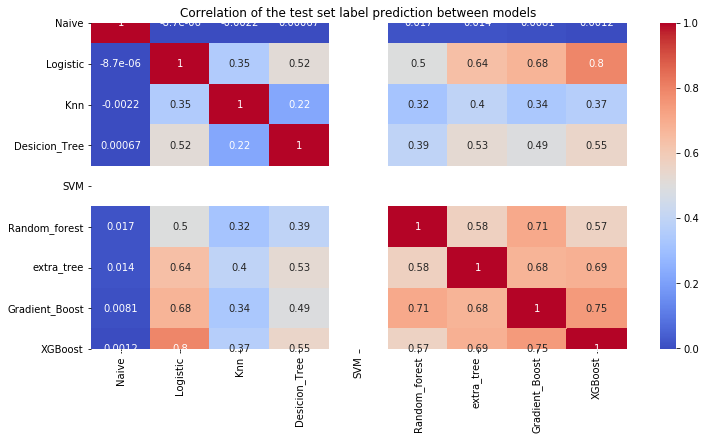

In [117]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [118]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]



In [119]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Top Absolute Correlations
Naive  Logistic          0.000009
       Desicion_Tree     0.000671
       XGBoost           0.001240
       Knn               0.002209
       Gradient_Boost    0.008100
dtype: float64


## Stacking Classifier

### Top 5 Estimators

In [99]:
#top 5 estimators
estimators_ = [('XGBoost', xgbc_grid.best_estimator_),
('extra_tree', etc_grid.best_estimator_),('Random_forest', rfc_grid.best_estimator_),
('SVM', grid_svm.best_estimator_),('Logistic', grid_PLR.best_estimator_)]

In [100]:
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.2,0.3],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf1_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8560182716420941
Best Mean Cross Validation params is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9613261850458615
Test score is 0.864968334717608


# Cost Sensitive Algorithms

In [74]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [75]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

## logistic regession

In [76]:
#cost sensitive logistic regession
param_grid = {
'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
cgrid_logreg.fit(X_train, y_train)
print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.84


## SVC

In [77]:
#svc
param_grid = {
'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_svc= GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_svc.fit(X_train, y_train)
print("Best parameters: {}".format(cgrid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_svc.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.84


## Decision Tree

In [78]:
#decison tree
param_grid = {
'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_dtree.fit(X_train, y_train)
print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.65


## XGB

In [79]:
#xgb
param_grid = {
'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_xgboost.fit(X_train, y_train)
print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))

Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.82


## Random Forest

In [80]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % scores.mean())



Mean ROC AUC: 0.834


## Extra Trees

In [81]:
#extratrees
rf = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.826


## Bagging Decision Tree

In [82]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Using TensorFlow backend.


Mean ROC AUC: 0.803


# Data Sampling Algorithms

In [83]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Decision tree

In [84]:
#decisiontreee
pipe_roc_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_dtree.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.75


## Logistic regression

In [103]:
#logistic regression
pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_roc_lg = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_lg= GridSearchCV(pipe_roc_lg,param_roc_lg, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_lg.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.4f}".format(ogrid_lg.best_score_))

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.8357


## Knn

In [86]:
#knn
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_roc_knn = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_knn.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.76


## SVM

In [87]:
#svm
pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',svm.SVC(C=10,gamma=0.1,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_svm.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.81


## Randomforest

In [88]:
#randomforest
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4,5], 
                'rf__max_depth' : [4,5]}
ogrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_rf.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_rf.best_score_))

Best parameters: {'rf__max_depth': 5, 'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.82


## xgb

In [89]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                early_stopping_rounds=2,
                                                                n_estimators=100,
                                                                objective ='binary:logistic',
                                                                max_depth = 4,
                                                               ))])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5],
'xgb__learning_rate' : [0.1,0.5]}
ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_xgb.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))


Best parameters: {'smote__k_neighbors': 5, 'xgb__learning_rate': 0.1}
Best Mean cross-validation score: 0.84


## Easy Ensemble Classifier

In [90]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}
ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_ee.fit(X_train, y_train)
print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.82


## Stacking Classifier

In [97]:
#top 5 estimators
estimators_ = [('XGBoost', xgbc_grid.best_estimator_),
('Logistic', grid_PLR.best_estimator_),('Random_forest', rfc_grid.best_estimator_),
('Cost_Sensitive_Log', cgrid_logreg.best_estimator_),('SVM', grid_svm.best_estimator_)]

In [98]:
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators_, 
                           final_estimator=LogisticRegression())
sclf2_param = {'final_estimator__C' : [0.1,0.2],
               'stack_method':['auto']
              }

sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf2_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8556026815633633
Best Mean Cross Validation params is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9571941984340906
Test score is 0.8646438953488372
